<a href="https://colab.research.google.com/github/harshwin1429-afk/Week-7-Assignment-/blob/main/K_means_clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
#K-MEANS CLUSTERING IN PYTHON
#Import Libraries
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [9]:
#Load Dataset
df = pd.read_csv("/content/Mall_Customers.csv")
print(df.head())

   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40


In [10]:
#Select Features for Clustering
X = df[["Annual Income (k$)", "Spending Score (1-100)"]]

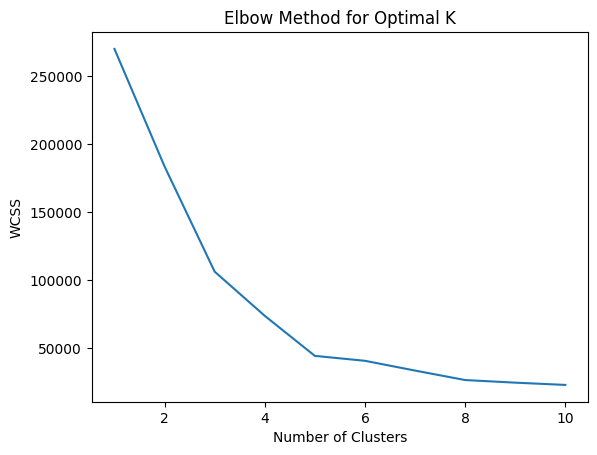

In [11]:
#Find Optimal K using Elbow Method
wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss)
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS")
plt.title("Elbow Method for Optimal K")
plt.show()

In [12]:
#Apply K-Means Clustering
kmeans = KMeans(n_clusters=5, random_state=42)
df["Cluster"] = kmeans.fit_predict(X)

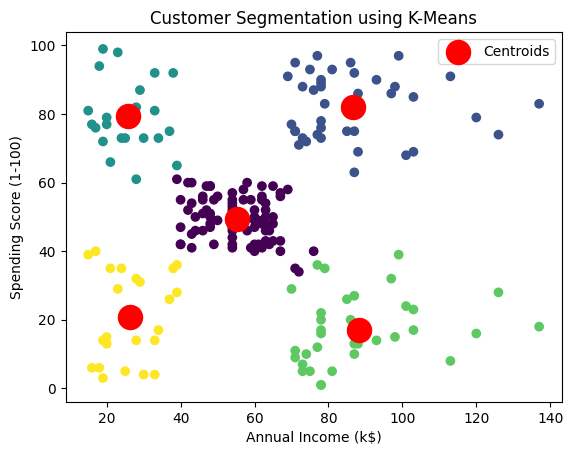

In [13]:
#Visualize Clusters
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=df["Cluster"], cmap="viridis")
plt.scatter(
    kmeans.cluster_centers_[:, 0],
    kmeans.cluster_centers_[:, 1],
    s=300,
    c="red",
    label="Centroids"
)
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1-100)")
plt.title("Customer Segmentation using K-Means")
plt.legend()
plt.show()